In [34]:
#Step 1: Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [35]:
transformed_car_data = r"C:\Users\asimi\Documents\Data_Engineering_Bootcamp\Git_Project_1\1st-BBDA-project\Transform\Final_car_data.csv"
df_cars = pd.read_csv(transformed_car_data)

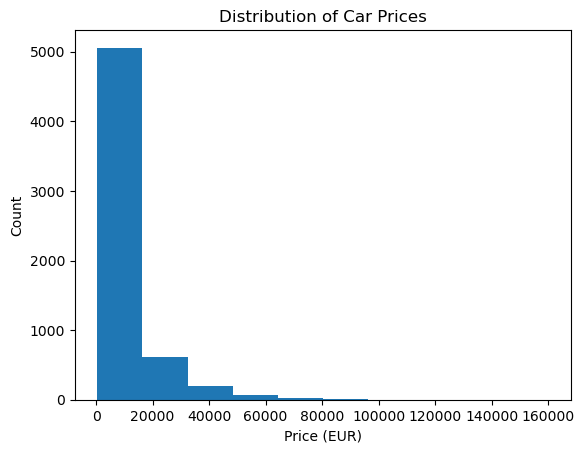

In [36]:
# 1. Distribution of Car Prices
plt.figure()
plt.hist(df_cars["Price_EUR"].dropna())
plt.xlabel("Price (EUR)")
plt.ylabel("Count")
plt.title("Distribution of Car Prices")
plt.show()

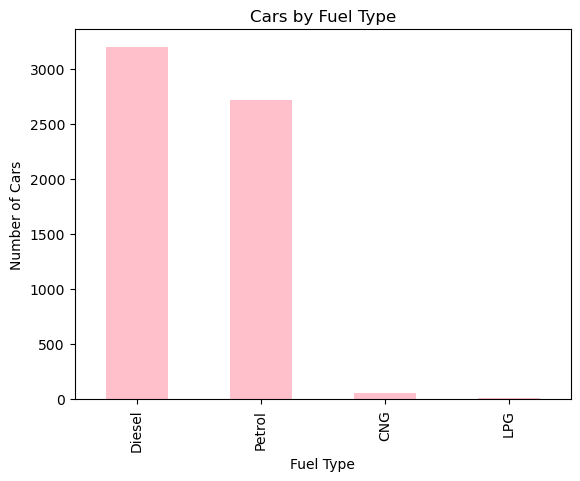

In [37]:
# 2. Cars by Fuel Type
plt.figure()
df_cars["Fuel_Type"].value_counts().plot(kind="bar", color="pink")
plt.xlabel("Fuel Type")
plt.ylabel("Number of Cars")
plt.title("Cars by Fuel Type")
plt.show()

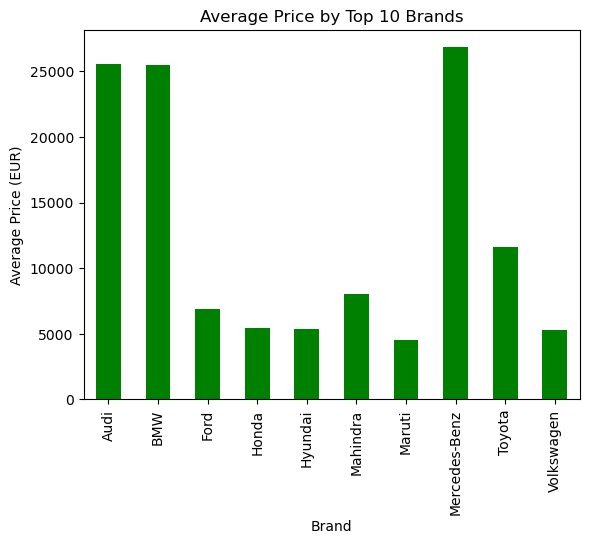

In [38]:
# 3. Average Price by Car Brand 
plt.figure()
top_brands = df_cars["Brand"].value_counts().head(10).index
df_cars[df_cars["Brand"].isin(top_brands)].groupby("Brand")["Price_EUR"].mean().plot(kind="bar", color="green")
plt.xlabel("Brand")
plt.ylabel("Average Price (EUR)")
plt.title("Average Price by Top 10 Brands")
plt.show()

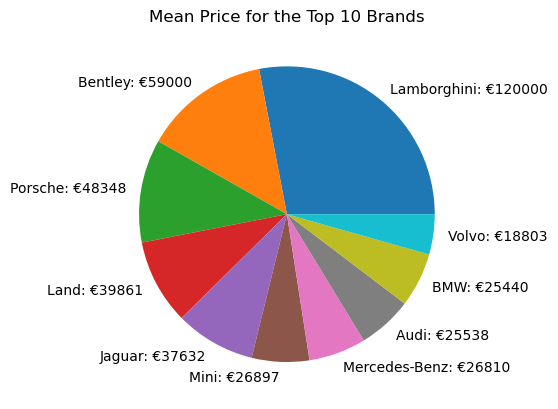

In [39]:
# 3.1. Mean Price for the Top 10 Car Branch
plt.figure()
mean_prices = df_cars.groupby("Brand")["Price_EUR"].mean().sort_values(ascending=False).head(10)
plt.pie(mean_prices, labels=[f"{brand}: €{price:.0f}" for brand, price in mean_prices.items()])
plt.title("Mean Price for the Top 10 Brands")
plt.show()

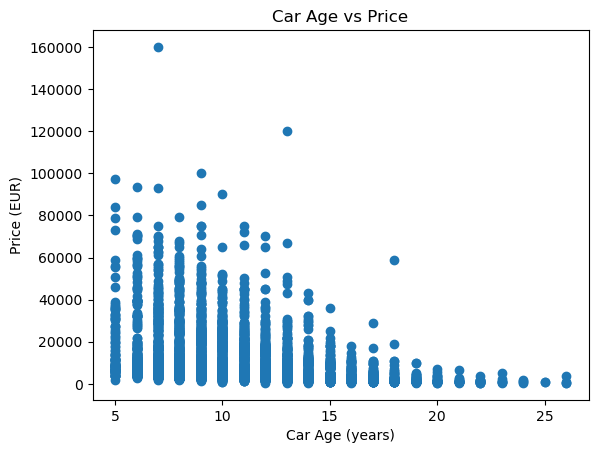

In [40]:
# 4. Car Age vs Price 
plt.figure()
car_age = 2024 - df_cars["Year"]
plt.scatter(car_age, df_cars["Price_EUR"])
plt.xlabel("Car Age (years)")
plt.ylabel("Price (EUR)")
plt.title("Car Age vs Price")
plt.show()

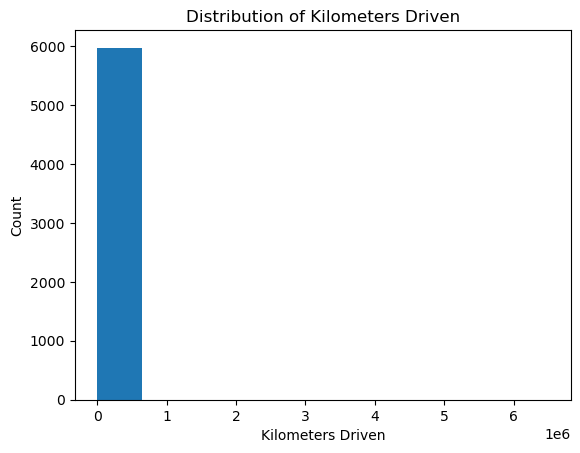

In [41]:
# 5. Kilometers Driven Distribution
plt.figure()
plt.hist(df_cars["Kilometers_Driven"])
plt.xlabel("Kilometers Driven")
plt.ylabel("Count")
plt.title("Distribution of Kilometers Driven")
plt.show()

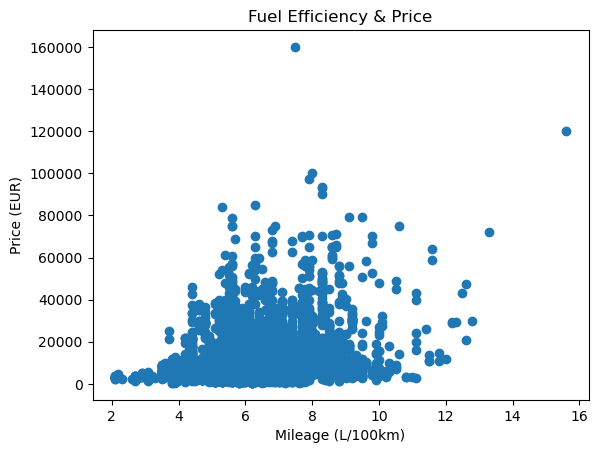

In [42]:
# 6. Fuel Efficiency vs Price
plt.figure()
mileage_clean = df_cars["Mileage_L/100km"].dropna()
price_clean = df_cars.loc[mileage_clean.index, "Price_EUR"]

plt.scatter(mileage_clean, price_clean)
plt.xlabel("Mileage (L/100km)")
plt.ylabel("Price (EUR)")
plt.title("Fuel Efficiency & Price")
plt.show()

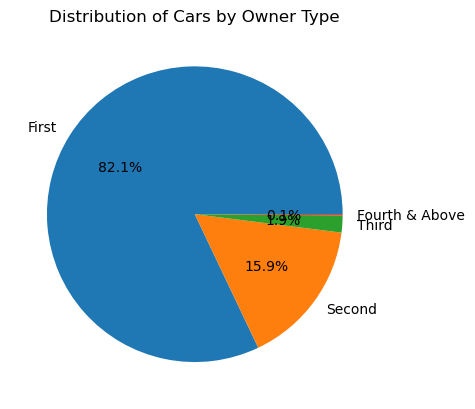

In [43]:
# 7. Percentage of the Owner Type per Car
plt.figure()
owner_counts = df_cars["Owner_Type"].value_counts()
plt.pie(owner_counts, labels=owner_counts.index, autopct="%1.1f%%")
plt.title("Distribution of Cars by Owner Type")
plt.show()

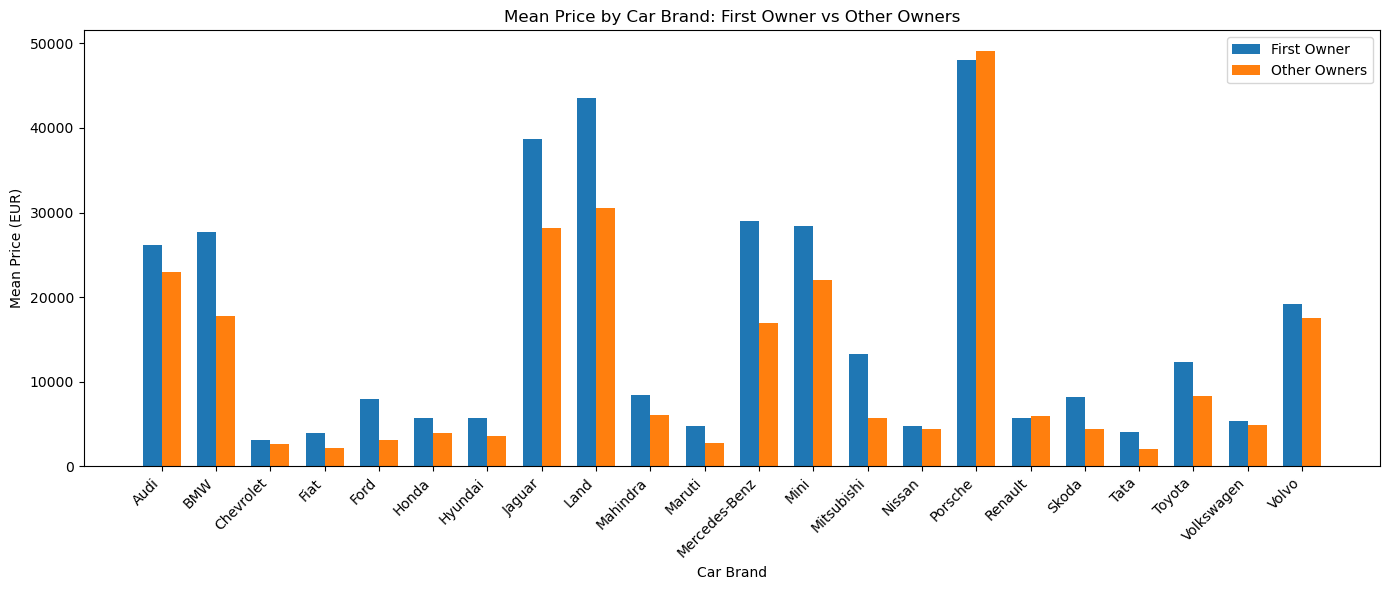

In [44]:
# 8. Compare the mean price of each car brand based on the owner type column
first_owner = df_cars[df_cars["Owner_Type"] == "First"].groupby("Brand")["Price_EUR"].mean()
other_owner = df_cars[df_cars["Owner_Type"] != "First"].groupby("Brand")["Price_EUR"].mean()

# Align brands (common index)
brands = sorted(set(first_owner.index).intersection(other_owner.index))

first_vals = first_owner[brands]
other_vals = other_owner[brands]

# X positions
x = np.arange(len(brands))
width = 0.35

# Plot
plt.figure(figsize=(14,6))
plt.bar(x - width/2, first_vals, width, label="First Owner")
plt.bar(x + width/2, other_vals, width, label="Other Owners")

plt.xticks(x, brands, rotation=45, ha="right")
plt.ylabel("Mean Price (EUR)")
plt.xlabel("Car Brand")
plt.title("Mean Price by Car Brand: First Owner vs Other Owners")
plt.legend()
plt.tight_layout()
plt.show()

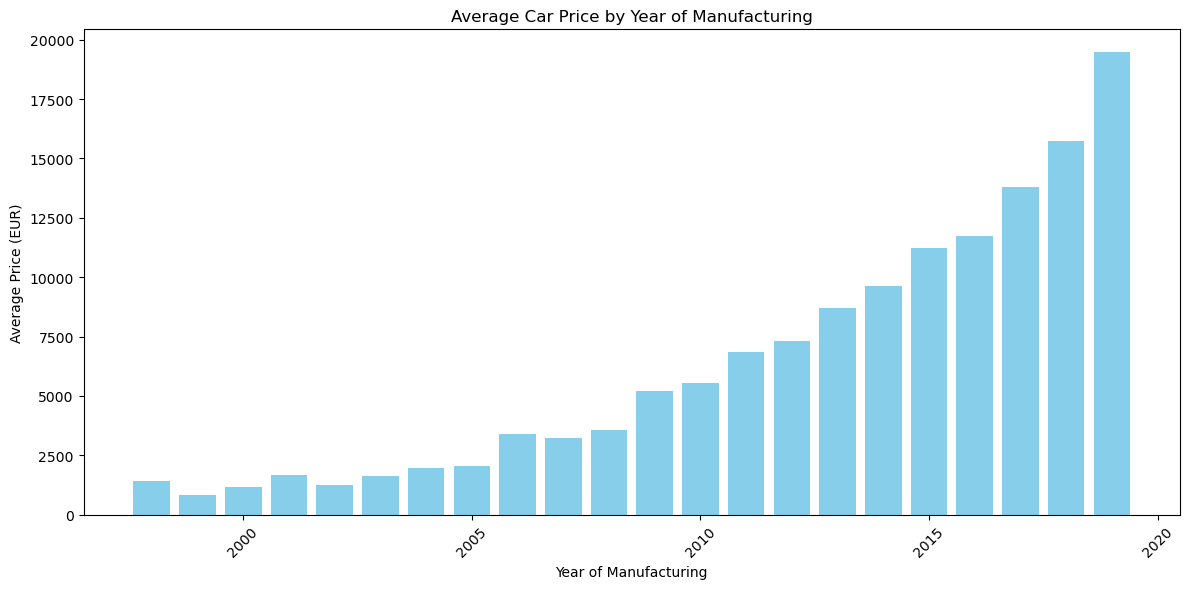

In [46]:
# 9. Average Price of cars according to the year of manufacturing
# Group by Year and calculate average price
avg_price_per_year = df_cars.groupby("Year")["Price_EUR"].mean().sort_index()

# Plot
plt.figure(figsize=(12,6))
plt.bar(avg_price_per_year.index, avg_price_per_year.values, color='skyblue')
plt.xlabel("Year of Manufacturing")
plt.ylabel("Average Price (EUR)")
plt.title("Average Car Price by Year of Manufacturing")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()